# Extract data for Elements of Data Science

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Download the Stata data from https://gss.norc.org/get-the-data/stata

Move to data/raw and unzip


In [3]:
!ls GSS_stata/

'2022 Release Variables.pdf'	 gss7222_r3a.dta  'Release Notes 7222.pdf'
'GSS 2022 Codebook.pdf'		 gss7222_r3.dta
"GSS 2022 - What's New R3.pdf"	 ReadMe.txt


In [4]:
filename = "GSS_stata/gss7222_r3a.dta"

In [44]:
columns = sorted(
    [
        'abany',
         'abdefect',
         'abhlth',
         'abnomore',
         'abpoor',
         'abrape',
         'absingle',
         'acqntsex',
         'age',
         'attend',
         'ballot',
         'cohort',
         'degree',
         'discaffm',
         'discaffw',
         'divorce',
         'educ',
         'fair',
         'fechld',
         'fefam',
         'fehelp',
         'fehire',
         'fehome',
         'fejobaff',
         'fepol',
         'fepres',
         'fepresch',
         'fework',
         'frndsex',
         'fund',
         'hapmar',
         'happy',
         'health',
         'helpful',
         'id',
         'life',
         'matesex',
         'othersex',
         'paidsex',
         'partyid',
         'pikupsex',
         'polviews',
         'race',
         'realinc',
         'realrinc',
         'region',
         'relig',
         'reliten',
         'rincome',
         'sex',
         'sexbirth',
         'sexfreq',
         'sexnow',
         'sexornt',
         'sexsex',
         'sexsex5',
         'spanking',
         'srcbelt',
         'trust',
         'wtssall',
         'wtssps',
         'year'
    ]
)

In [45]:
gss = pd.read_stata(filename, columns=columns, convert_categoricals=False)

In [46]:
# weights are different in 2021 and 2022 so mixing them in might seem like a bad idea,
# but we only use them for resampling within one year of the survey,
# so I think it's ok
gss["wtssall"] = gss["wtssall"].fillna(gss["wtssps"])
gss["wtssall"].describe()

count    72390.000000
mean         1.000014
std          0.550871
min          0.073972
25%          0.549300
50%          0.961700
75%          1.098500
max         14.272462
Name: wtssall, dtype: float64

In [47]:
del gss["wtssps"]

In [48]:
print(gss.shape)
gss.head()

(72390, 61)


,abany,abdefect,abhlth,abnomore,abpoor,abrape,absingle,acqntsex,age,attend,...,sexfreq,sexnow,sexornt,sexsex,sexsex5,spanking,srcbelt,trust,wtssall,year
0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,23.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.4446,1972
1,NaN,1.0,1.0,2.0,2.0,1.0,1.0,NaN,70.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.8893,1972
2,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,48.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,0.8893,1972
3,NaN,2.0,1.0,2.0,1.0,1.0,1.0,NaN,27.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,0.8893,1972
4,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,61.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,0.8893,1972


## Inventory

fechld 

A. A working mother can establish just as warm and secure a relationship with her children as a mother who does not work.

fefam

D. It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family.

fehelp

B. It is more important for a wife to help her husband's career than to have one herself.

fehire

Because of past discrimination, employers should make special efforts to hire and promote qualified women.

fehome

Women should take care of running their homes and leave running the country up to men.

fejobaff

Some people say that because of past discrimination, women should be given preference in hiring and promotion. Others say that such preference in hiring and promotion of women is wrong because it discriminates against men. What about your opinion - are you for or against preferential hiring and promotion of women?
IF FOR:Do you favor preference in hiring and promotion strongly or not strongly?
IF AGAINST:Do you oppose preference in hiring and promotion strongly or not strongly?

fepol

A. Tell me if you agree or disagree with this statement:  Most men are better suited emotionally for politics than are most women.


fepres

If your party nominated a woman for President, would you vote for her if she were qualified for the job?

fepresch

C. A preschool child is likely to suffer if his or her mother works.

fework

Do you approve or disapprove of a married woman earning money in business or industry if she has a husband capable of supporting her?




In [52]:
fe_columns = [x for x in gss.columns if x.startswith('fe')]
fe_columns

['fechld',
 'fefam',
 'fehelp',
 'fehire',
 'fehome',
 'fejobaff',
 'fepol',
 'fepres',
 'fepresch',
 'fework']

In [58]:
len(fe_columns)

10

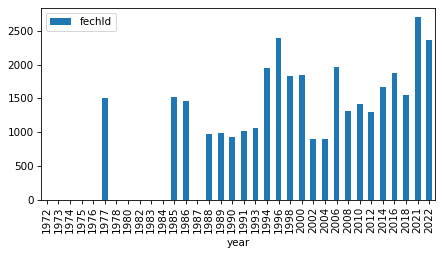

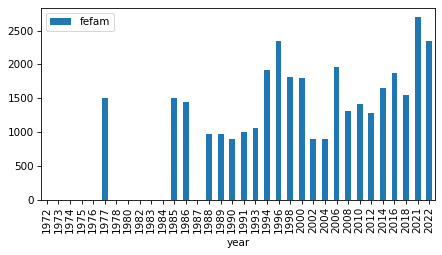

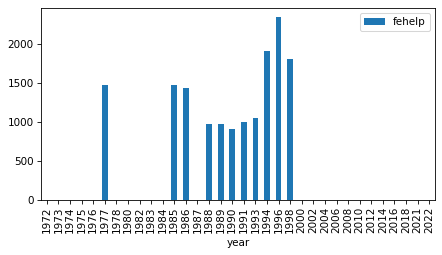

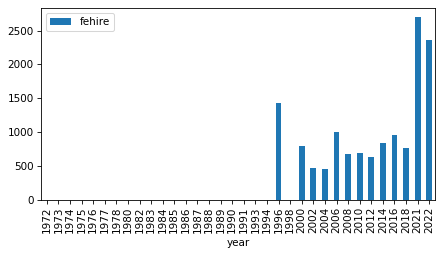

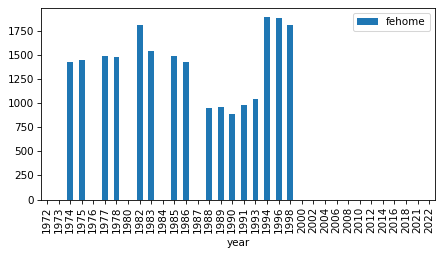

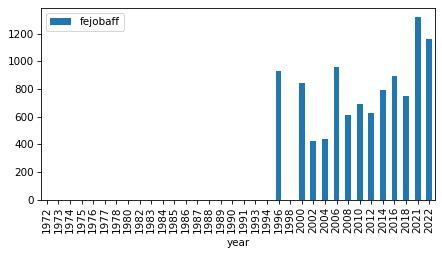

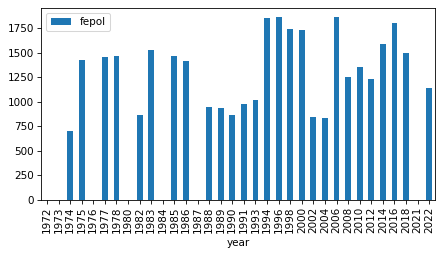

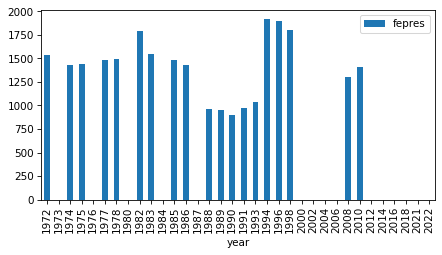

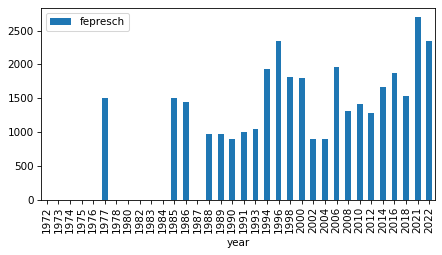

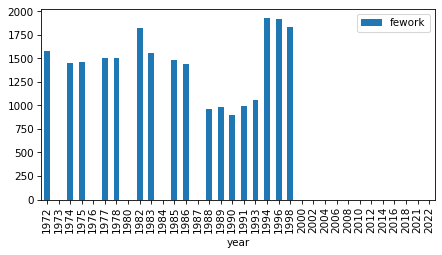

In [55]:
from utils import decorate

grouped = gss.groupby('year')

for col in fe_columns:
    plt.figure()
    grouped[col].count().plot.bar()
    decorate()

Most are on a four point scale:

```
1	STRONGLY AGREE	
2	AGREE	
3	DISAGREE	
4	STRONGLY DISAGREE
```

`fehire` is on a five-point scale

```
1	STRONGLY AGREE
2	AGREE	
3	NEITHER AGREE NOR DISAGREE	
4	DISAGREE	
5	STRONGLY DISAGREE
```
Some are on a two-point scale

In [56]:
from utils import values

for col in fe_columns:
    print(values(gss[col]))

fechld
1.0     9240
2.0    15202
3.0     8666
4.0     2342
NaN    36940
Name: count, dtype: int64
fefam
1.0     2810
2.0     9839
3.0    15198
4.0     7284
NaN    37259
Name: count, dtype: int64
fehelp
1.0      769
2.0     3769
3.0     7732
4.0     3041
NaN    57079
Name: count, dtype: int64
fehire
1.0     2817
2.0     5945
3.0     2048
4.0     2389
5.0      580
NaN    58611
Name: count, dtype: int64
fehome
1.0     5424
2.0    17114
NaN    49852
Name: count, dtype: int64
fejobaff
1.0     2299
2.0     1311
3.0     2906
4.0     3936
NaN    61938
Name: count, dtype: int64
fepol
1.0     9982
2.0    25715
NaN    36693
Name: count, dtype: int64
fepres
1.0    23257
2.0     3531
5.0        4
NaN    45598
Name: count, dtype: int64
fepresch
1.0     2817
2.0    11254
3.0    16303
4.0     4731
NaN    37285
Name: count, dtype: int64
fework
1.0    18753
2.0     5648
NaN    47989
Name: count, dtype: int64


In [59]:
four_point = ['fechld', 'fefam', 'fehelp', 'fejobaff', 'fepresch'] 
five_point = ['fehire']

two_point = ['fepol', 'fehome', 'fework'] + ['fepres']

fepol and fehome: 1 agree, 2 disagree

fework: 1 approve, 2 disapprove

fepres: 1 yes 2 no 5 would not vote -- let's replace 5 with no

In [61]:
gss['fepres'] = gss['fepres'].replace(5, 2)
values(gss['fepres'])

fepres
1.0    23257
2.0     3535
NaN    45598
Name: count, dtype: int64

## Write extracts

In [49]:
!rm -f gss_eds_2022.hdf

In [50]:
gss.to_hdf("gss_feminism_2022.hdf", key="gss", complevel=6)

In [51]:
!ls -lh gss_feminism_2022.hdf

-rw-rw-r-- 1 downey downey 3.2M May 31 09:19 gss_feminism_2022.hdf


Resample

In [18]:
from utils import resample_by_year

In [19]:
sample = resample_by_year(gss, "wtssall")

In [20]:
!rm gss_feminism_resampled.hdf

rm: cannot remove 'gss_feminism_resampled.hdf': No such file or directory


In [21]:
sample.to_hdf("gss_feminism_resampled.hdf", key="gss", complevel=6)

In [22]:
!ls -lh gss_feminism_resampled.hdf

-rw-rw-r-- 1 downey downey 3.3M May 31 08:59 gss_feminism_resampled.hdf
